<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana1/Espacios_de_probabilidad_variables_aleatorias_discretas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías y funciones

In [1]:
import numpy as np
import itertools 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

####burbujas_espacio_probabilidad()



In [2]:
def burbujas_espacio_probabilidad(elementos, probabilidad):
  '''
  Función que muestra grafico de burbuja de un espacio de probabilidad de una
  variable aleatoria discreta

  elementos: lista, vector o serie que contiene los posibles elementos
  probabilidad: lista, vector o serie que contiene la probabilidad de cada 
                elemento
  nombre_var: objeto de texto con el nombre de la variable aleatoria
  '''

  
  n = len(elementos)
  X = np.random.randint(1, 8000,n)
  Y = np.random.randint(1, 8000,n)
  P = np.array(probabilidad)
  color = np.random.rand(n)
  titulo = 'Espacio de probabilidad' 
  plt.scatter(x=X, y=Y, s=P*10000,
              c = color, alpha=0.5)
  margen =2500
  plt.xlim(min(X)-margen, max(X)+margen)
  plt.ylim(min(X)-margen,max(X)+margen)
  plt.title(titulo)

  #Mostrar valores de los elementos y sus probabilidades
  for e, p, x, y in zip(elementos,P,X,Y):
    plt.annotate("{}".format(e), 
                 xy=(x, y), 
                 ha="center", va="center")
    #plt.annotate(e ,xy=(x, y), xytext=(0,np.sqrt(p*10000)/2.+5), 
     #            textcoords="offset points", ha="center", va="bottom")

  #Eliminar texto y marcas de los ejes
  ax = plt.gca( )
  ax.axes.xaxis.set_ticks([])
  ax.axes.yaxis.set_ticks([])
  plt.show()

####prueba_independencia()

In [3]:
def prueba_independencia(pA, pB, pAnB):
  return round(pA*pB,2) == round(pAnB,2)


#### probabilidad_condicional()

In [4]:
def probabilidad_condicional(pA, pB, pAnB):
  pA_B = round(pAnB / pB, 2)
  pB_A = round(pAnB / pA, 2)
  print('P(A):', round(pA,2))
  print('P(B):', round(pB,2))
  print('P(A|B):', pA_B)
  print('P(B|A):', pB_A)
  return pA_B, pB_A

# Resultado al lanzar un dado

## Espacio de probabilidad

In [5]:
W = [1, 2, 3, 4, 5, 6]   #omega
P = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]        

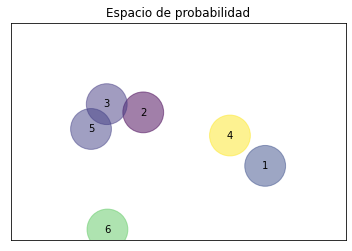

In [6]:
np.random.seed(15)
burbujas_espacio_probabilidad(W, P)

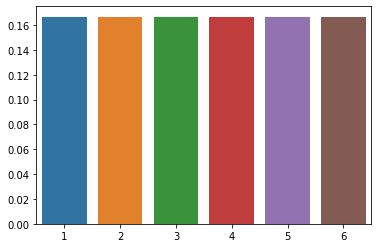

In [7]:
sns.barplot(x= W, y = P)
plt.show()

# Lanzar dos dados 

## Ley de probabilidad de las combinaciones al tirar dos dados

In [8]:
dado = [1, 2, 3, 4, 5, 6] 

#obtener las 36 combinaciones
combinaciones = list(itertools.product(dado, repeat=2))
probabilidades = list(itertools.repeat(1/36,36))

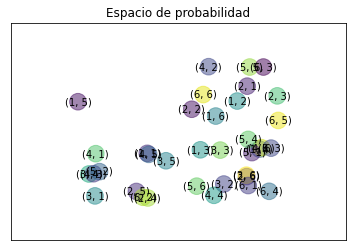

In [9]:
np.random.seed(22)
burbujas_espacio_probabilidad(combinaciones, probabilidades)

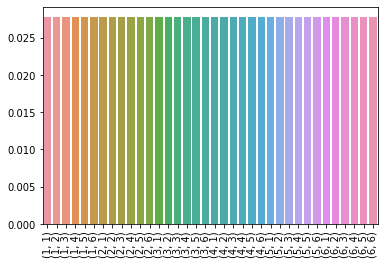

In [10]:
grafica = sns.barplot(x= [str(i) for i in combinaciones], y = probabilidades )
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=90)
plt.show()

## Ley de probabilidad de la suma de dos dados

In [11]:
dos_dados = pd.DataFrame(combinaciones)
dos_dados.columns = ['dado1', 'dado2']
dos_dados['suma'] = dos_dados['dado1'] + dos_dados['dado2']
dos_dados['probabilidad']= probabilidades

In [12]:
Ley_P_suma = pd.DataFrame(dos_dados['suma'].value_counts(sort=False, 
                                                         normalize=True))

Ley_P_suma.reset_index(inplace=True)
Ley_P_suma.columns=['elementos', 'probabilidad']

Ley_P_suma

,elementos,probabilidad
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


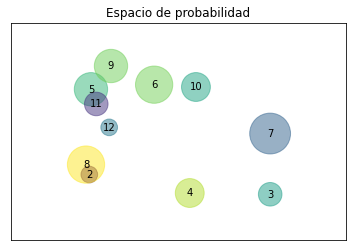

In [13]:
np.random.seed(10)   
burbujas_espacio_probabilidad(Ley_P_suma['elementos'],
                              Ley_P_suma['probabilidad'])

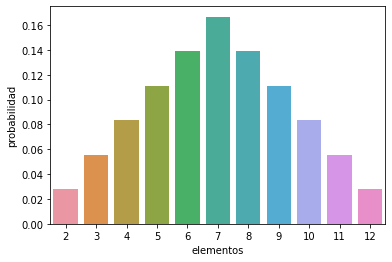

In [14]:
sns.barplot(x=Ley_P_suma['elementos'], y=Ley_P_suma['probabilidad'] )
plt.show()

# Caracteres en el libro 100 años de soledad


In [15]:
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')
Ley_P_letras

,caracter,probabilidad
0,,0.174719
1,a,0.111833
2,b,0.014382
3,c,0.033636
4,d,0.043164
5,e,0.104264
6,f,0.005159
7,g,0.008022
8,h,0.007221
9,i,0.052305


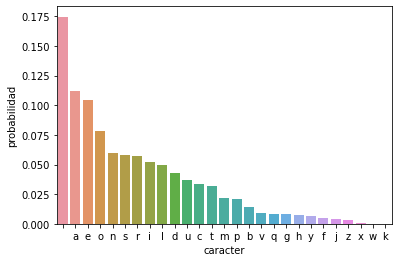

In [16]:
Ley_P_letras=Ley_P_letras.sort_values('probabilidad', ascending=False)
sns.barplot(x= Ley_P_letras['caracter'],y = Ley_P_letras['probabilidad'] )
plt.show()

##  Ley de Probabilidad del tipo de caracteres en 100 años de soledad

In [17]:
caracteres = sorted(list(Ley_P_letras['caracter']))
vocales = list('aeiou')
espacio = [' ']

consonantes = []
for c in caracteres:
  if c not in (vocales + espacio):
    consonantes += c 

In [18]:
Ley_P_letras['tipo']=np.nan
Ley_P_letras['tipo']=np.where(Ley_P_letras['caracter'].isin(vocales), 'vocal',
                              np.where(Ley_P_letras['caracter']==' ', 'espacio', 
                                       'consonante'))


In [19]:
por_tipo=Ley_P_letras.groupby('tipo')
Ley_P_tipo_letra = por_tipo.agg({'probabilidad':'sum'})
Ley_P_tipo_letra=Ley_P_tipo_letra.reset_index()
Ley_P_tipo_letra

,tipo,probabilidad
0,consonante,0.441228
1,espacio,0.174719
2,vocal,0.384053


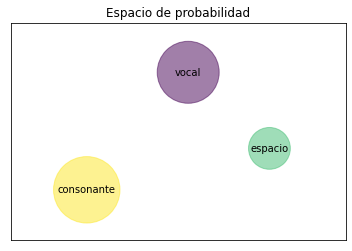

In [20]:
np.random.seed(10)   
burbujas_espacio_probabilidad(Ley_P_tipo_letra['tipo'],
                              Ley_P_tipo_letra['probabilidad'])

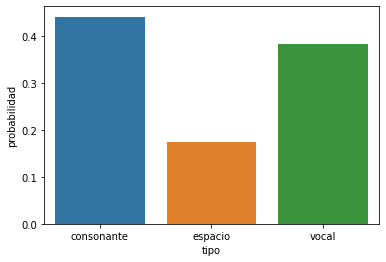

In [21]:
sns.barplot(x= Ley_P_tipo_letra['tipo'], y=Ley_P_tipo_letra['probabilidad'])
plt.show()